In [2]:
## Import libraries
import shap
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import regex as re
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import math
from sklearn.model_selection import cross_validate
import joblib
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["green", "orange"], N=256) 

In [4]:
## Import best model (KNN)
k_nearest_neighbors = joblib.load("../top_models/best_KNN.pkl")

In [5]:
## Import dataframe for 70_30 feature selected data.
name = "../data/feature_selected_test_dataset_70_30.csv"
df = pd.read_csv(name)

## Separate into features and outcomes
X_test = df.drop(['outcome'], axis=1, inplace=False)
y_test = df["outcome"]

## Scale X with standard scaler for models that require it.
X_test_scaled = StandardScaler().fit_transform(X_test)

In [6]:
## Create list of feature names
feature_names = X_test.columns

In [7]:
## Create dataframe with scaled data and columns with feature names for test data
X_frame_test = pd.DataFrame(data=X_test_scaled, columns=feature_names)

In [8]:
## Create explainer and shap values for model with 
shap.initjs()
explainer = shap.KernelExplainer(k_nearest_neighbors._final_estimator.predict, X_frame_test)
shap_values = explainer.shap_values(X_frame_test)

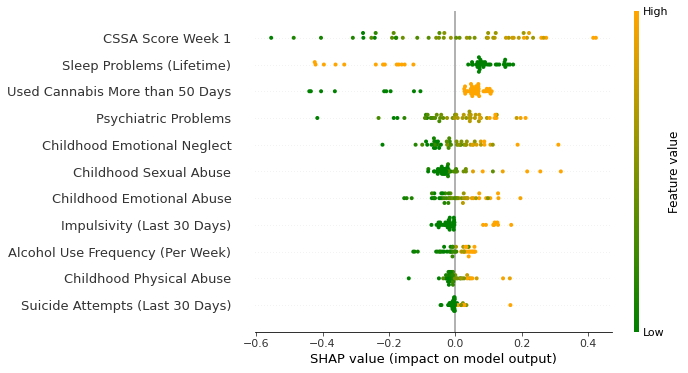

In [9]:
## Create shap summary plot
shap.summary_plot(shap_values, X_frame_test, show=False, cmap=cmap)
plt.savefig('../figures/KNN_SHAP_summary_plot.png')

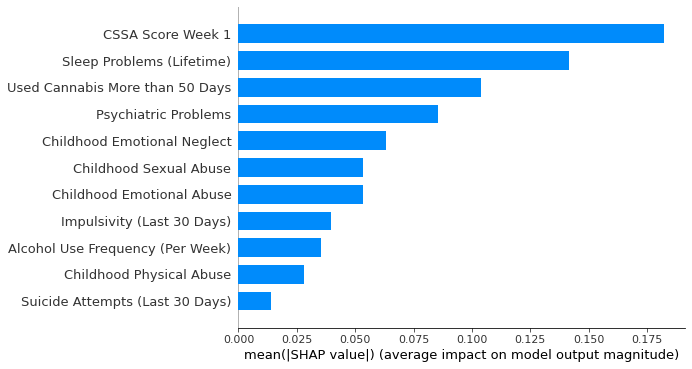

In [10]:
## Create shap summary plot as standard feature importance plot (bar plot)
shap.summary_plot(shap_values, X_frame_test, show=False, plot_type='bar')
plt.savefig('../figures/KNN_SHAP_bar_summary_plot.png')